## ðŸ¥” Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### I. Importing Librairies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We first use the splitfolder library to split our raw data into 3 datasets: the training (80%), validation (10%) and the testing dataset  (10%).

`splitfolders --output ../data/dataset --ratio 0.7 0.1 0.2 -- ../data/raw/PlantVillage/`

Seting up all the Constants

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [3]:
import os

# Path to the main dataset directory
dataset_path = "C:\\Users\\dell-pc\\Downloads\\Potato-Disease-Classification-master\\Potato-Disease-Classification-master\\data\\raw\\PlantVillage"

# Get the list of class names (subdirectories)
class_names = sorted(entry.name for entry in os.scandir(dataset_path) if entry.is_dir())

# Print class names
print("Class Names:", class_names)

# Initialize a dictionary to count the number of images for each class
class_counts = {class_name: 0 for class_name in class_names}

# Count the number of images in each class directory
total_images = 0
for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len([entry for entry in os.scandir(class_dir) if entry.is_file()])
    class_counts[class_name] = num_images
    total_images += num_images

# Print the number of images for each class
for class_name, count in class_counts.items():
    print(f"Number of images for {class_name}: {count}")

# Print the total number of images
print(f"Total number of images: {total_images}")


Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Number of images for Potato___Early_blight: 1000
Number of images for Potato___Late_blight: 1000
Number of images for Potato___healthy: 152
Total number of images: 2152


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with the required augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    '../data/dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

# Get the class indices and print them
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Initialize a dictionary to count the number of images for each class
class_counts = {class_name: 0 for class_name in class_indices.keys()}

# Count the number of images for each class
for class_name, class_index in class_indices.items():
    class_counts[class_name] = (train_generator.classes == class_index).sum()

# Print the number of images for each class
for class_name, count in class_counts.items():
    print(f"Number of images for {class_name}: {count}")

# Print the total number of images
total_images = train_generator.samples
print(f"Total number of images: {total_images}")


Found 1506 images belonging to 3 classes.
Class Indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
Number of images for Potato___Early_blight: 700
Number of images for Potato___Late_blight: 700
Number of images for Potato___healthy: 106
Total number of images: 1506


In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for validation data with the required augmentations
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

# Create the validation generator
validation_generator = validation_datagen.flow_from_directory(
    '../data/dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

# Get the class indices and print them
class_indices = validation_generator.class_indices
print("Validation Class Indices:", class_indices)

# Initialize a dictionary to count the number of images for each class
class_counts = {class_name: 0 for class_name in class_indices.keys()}

# Count the number of images for each class
for class_name, class_index in class_indices.items():
    class_counts[class_name] = (validation_generator.classes == class_index).sum()

# Print the number of images for each class
for class_name, count in class_counts.items():
    print(f"Number of images for {class_name} in validation set: {count}")

# Print the total number of images
total_images = validation_generator.samples
print(f"Total number of images in validation set: {total_images}")


Found 215 images belonging to 3 classes.
Validation Class Indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
Number of images for Potato___Early_blight in validation set: 100
Number of images for Potato___Late_blight in validation set: 100
Number of images for Potato___healthy in validation set: 15
Total number of images in validation set: 215


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for test data with the required augmentations
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    '../data/dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

# Get the class indices and print them
class_indices = test_generator.class_indices
print("Test Class Indices:", class_indices)

# Initialize a dictionary to count the number of images for each class
class_counts = {class_name: 0 for class_name in class_indices.keys()}

# Count the number of images for each class
for class_name, class_index in class_indices.items():
    class_counts[class_name] = (test_generator.classes == class_index).sum()

# Print the number of images for each class
for class_name, count in class_counts.items():
    print(f"Number of images for {class_name} in test set: {count}")

# Print the total number of images
total_images = test_generator.samples
print(f"Total number of images in test set: {total_images}")


Found 429 images belonging to 3 classes.
Test Class Indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
Number of images for Potato___Early_blight in test set: 200
Number of images for Potato___Late_blight in test set: 200
Number of images for Potato___healthy in test set: 29
Total number of images in test set: 429


Let's visualize some of the images from our dataset

In [8]:
class_names = list(test_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
class_names = list(validation_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

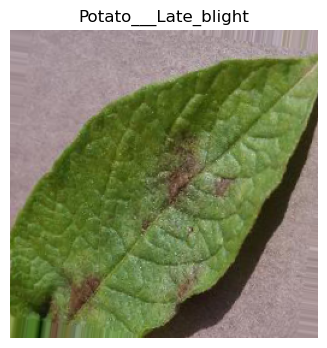

In [10]:
plt.figure(figsize=(12,4))

for image_batch, label_batch in train_generator:
    plt.imshow(image_batch[0])
    plt.title(class_names[int(label_batch[0])])
    plt.axis("off")
    break

### II. Model Building

We will use a CNN coupled with a Softmax activation in the output layer. 

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

#### Let's compile the model

We use `adam` optimizer, `SparseCategoricalCrossentropy`for losses and `accuracy` as a metric.

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
47/47 [==============================] - 182s 4s/step - loss: 0.8940 - accuracy: 0.5020 - val_loss: 0.8419 - val_accuracy: 0.6406
Epoch 2/50
47/47 [==============================] - 173s 4s/step - loss: 0.6569 - accuracy: 0.7151 - val_loss: 0.5977 - val_accuracy: 0.7240
Epoch 3/50
47/47 [==============================] - 173s 4s/step - loss: 0.4775 - accuracy: 0.7910 - val_loss: 0.4707 - val_accuracy: 0.7969
Epoch 4/50
47/47 [==============================] - 173s 4s/step - loss: 0.3682 - accuracy: 0.8474 - val_loss: 0.4002 - val_accuracy: 0.8490
Epoch 5/50
47/47 [==============================] - 172s 4s/step - loss: 0.2873 - accuracy: 0.8942 - val_loss: 0.2655 - val_accuracy: 0.8750
Epoch 6/50
47/47 [==============================] - 172s 4s/step - loss: 0.2862 - accuracy: 0.8942 - val_loss: 0.2538 - val_accuracy: 0.9062
Epoch 7/50
47/47 [==============================] - 172s 4s/step - loss: 0.2196 - accuracy: 0.9132 - val_loss: 0.2545 - val_accuracy: 0.8854
Epoch 8/50
47

In [15]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 13s 920ms/step - loss: 0.0690 - accuracy: 0.9767


ðŸ“ˆ Plotting the Accuracy and Loss Curves

In [16]:
scores

[0.06902310997247696, 0.9766899943351746]

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

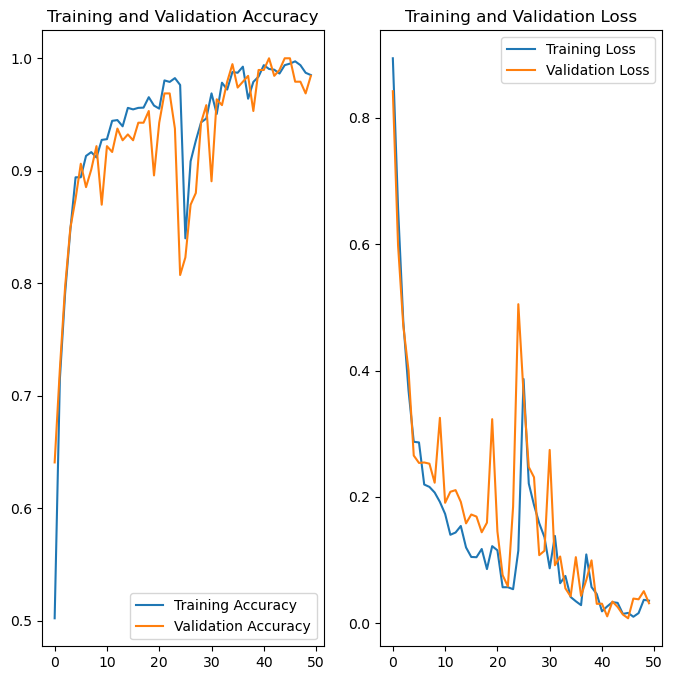

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### III. Prediction on a sample image

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 1s 708ms/step
Predicted label: Potato___Late_blight


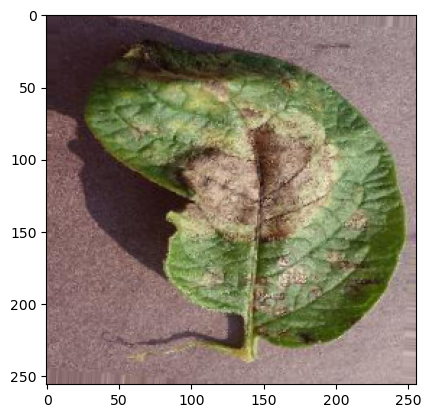

In [19]:
import numpy as np

for image_batch, label_batch in test_generator:

    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print(f"Actual label: {class_names[first_label]}")
    
    batch_prediction = model.predict(image_batch)
    print(f"Predicted label: {class_names[np.argmax(batch_prediction[0])]}")
    
    break

Let's write a function for inference

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


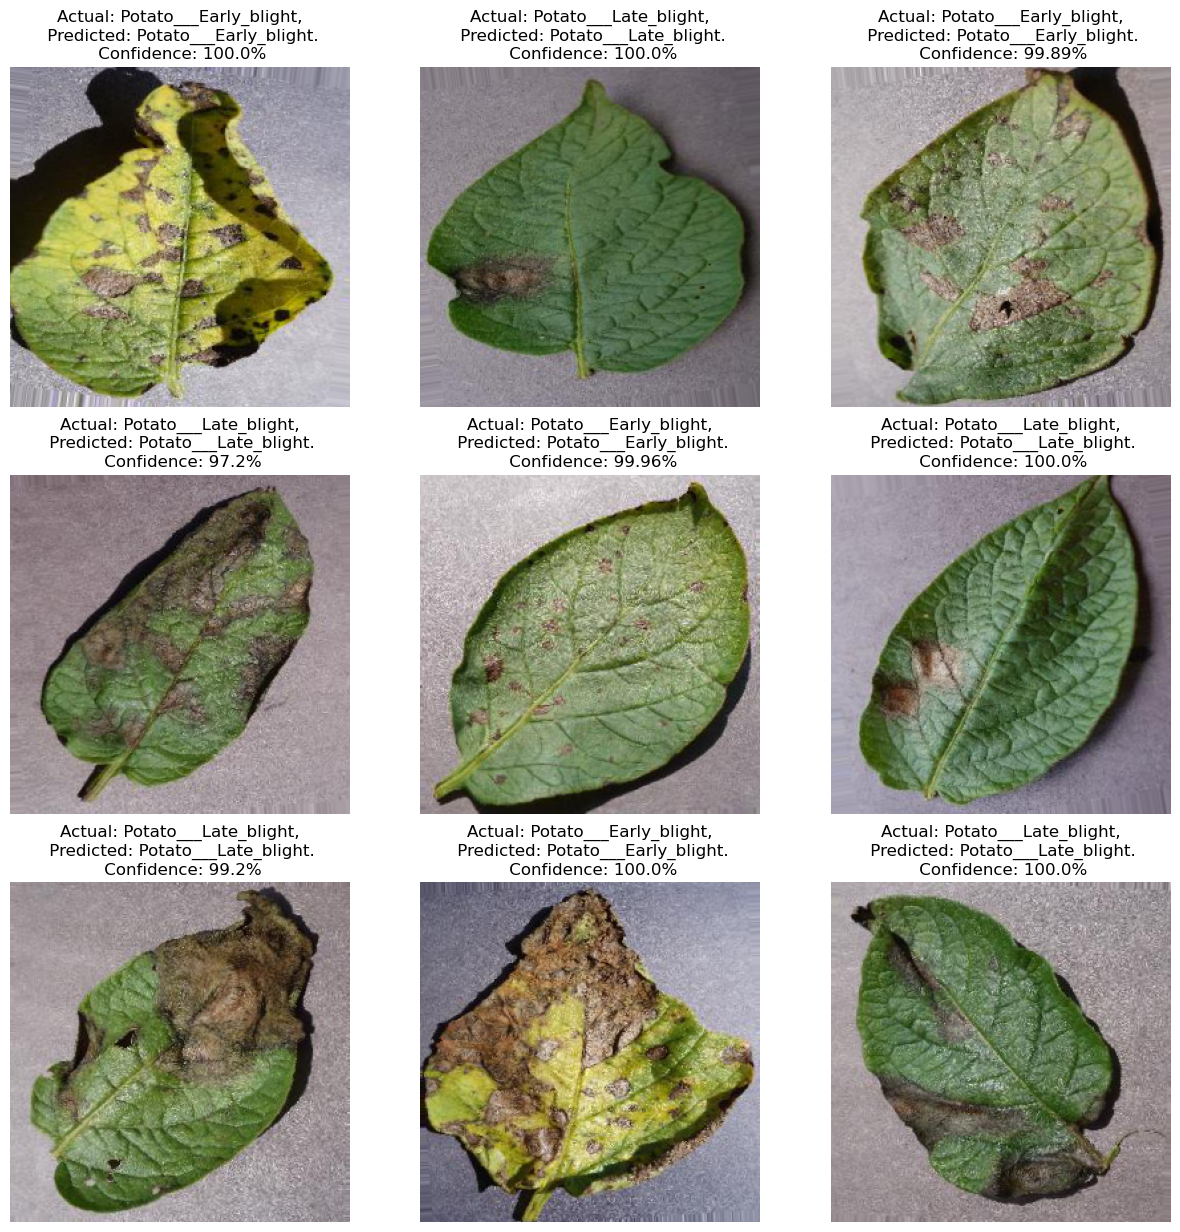

In [22]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

#### IV. Saving the Model

In [23]:
model.save("../models/potato.h5")